In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os #This module provides a portable way of using operating system dependent functionality.
import re #checking particular string matches a given regular expression

# Top 4 Python NLP Libraries

---
1. **Natural Language Toolkit (NLTK)**

https://inltk.readthedocs.io/en/latest/api_docs.html#identify-language
2.  **CoreNLP**

3.   **SpaCy**
4. **Gensim**

In [ ]:
#!python -m spacy download en_core_web_lg
#!python -m spacy download en_core_web_sm

# Getting Started with spaCy
# spaCy’s Statistical Models
# These models are the power engines of spaCy. These models enable spaCy to perform several NLP related tasks, such as part-of-speech tagging, named entity recognition, and dependency parsing.


1. Some common functionalities provided by the spacy.cli module include downloading language models, training custom models, and performing various tasks using the command line.

2. This line of code is using spaCy's command-line interface (CLI) to download a specific spaCy model called "en_core_web_lg." This model is the largest English model provided by spaCy, and it has a size of 788 MB.

4. The nlp object is now a spaCy language processing pipeline that can be used to process and analyze English text.


In [ ]:
import spacy.cli #spaCy’s CLI provides a range of helpful commands for downloading and training pipelines, converting data and debugging your config, data and installation.
spacy.cli.download("en_core_web_lg") #The model (en_core_web_lg) is the largest English model of spaCy with size 788 MB.
import en_core_web_lg
nlp = en_core_web_lg.load()

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


*spaCy’s* Processing Pipeline
The first step for a text string, when working with spaCy, is to pass it to an NLP object. This object is essentially a pipeline of several text pre-processing operations through which the input text string has to go through.
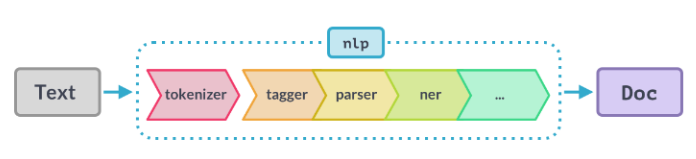

In [ ]:
#txt="Natural language processing is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language'"
#txt="This tree is illustrating the dependency relation"
doc = nlp(txt)
#spacy.displacy.render(doc,style='dep',jupyter=True)

The code spacy.displacy.render(doc, style='dep', jupyter=True) is using the displacy module from the spaCy library to visualize the dependency parse tree of a processed document (doc)


In [ ]:
txt = 'Natural language processing is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language'
#txt='Red soil, which is rich in calcium and potash, is suitable for growing cotton'
#txt='SOIL1 is known as Regur soil'

In [ ]:
#the active pipeline components:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [ ]:
print ([token.text for token in doc])

['This', 'tree', 'is', 'illustrating', 'the', 'dependency', 'relation']


In [ ]:
a=[]
for token in doc:
  print(token.text)
  a.append(token.text)

This
tree
is
illustrating
the
dependency
relation


**Part-of-Speech (POS) Tagging using spaCy**

In [ ]:
for token in doc:
    # Print the token and its part-of-speech tag
    print(token.text, "-->", token.tag_)

Natural --> JJ
language --> NN
processing --> NN
is --> VBZ
a --> DT
subfield --> NN
of --> IN
linguistics --> NNS
, --> ,
computer --> NN
science --> NN
, --> ,
and --> CC
artificial --> JJ
intelligence --> NN
concerned --> VBN
with --> IN
the --> DT
interactions --> NNS
between --> IN
computers --> NNS
and --> CC
human --> JJ
language --> NN


In [ ]:
spacy.explain("VBZ")


'verb, 3rd person singular present'

In [ ]:
#PRINT NOUN CHUNKS
for chunk in doc.noun_chunks:
    print (chunk)

Natural language processing
a subfield
linguistics
computer science
artificial intelligence
the interactions
computers
human language


In [ ]:
print ([token.lemma_ for token in doc])

['this', 'tree', 'be', 'illustrate', 'the', 'dependency', 'relation']


In [ ]:
for token in doc:
       print (token, token.tag_, token.pos_, spacy.explain(token.tag_))

Natural JJ ADJ adjective (English), other noun-modifier (Chinese)
language NN NOUN noun, singular or mass
processing NN NOUN noun, singular or mass
is VBZ AUX verb, 3rd person singular present
a DT DET determiner
subfield NN NOUN noun, singular or mass
of IN ADP conjunction, subordinating or preposition
linguistics NNS NOUN noun, plural
, , PUNCT punctuation mark, comma
computer NN NOUN noun, singular or mass
science NN NOUN noun, singular or mass
, , PUNCT punctuation mark, comma
and CC CCONJ conjunction, coordinating
artificial JJ ADJ adjective (English), other noun-modifier (Chinese)
intelligence NN NOUN noun, singular or mass
concerned VBN VERB verb, past participle
with IN ADP conjunction, subordinating or preposition
the DT DET determiner
interactions NNS NOUN noun, plural
between IN ADP conjunction, subordinating or preposition
computers NNS NOUN noun, plural
and CC CCONJ conjunction, coordinating
human JJ ADJ adjective (English), other noun-modifier (Chinese)
language NN NOUN n

In [ ]:
from collections import Counter
complete_text = ('Gandhi was the youngest child of his father’s fourth wife. His father—Karamchand Gandhi, who was the dewan (chief minister) of Porbandar, the capital of a small principality in western India (in what is now Gujarat state) under British suzerainty—did not have much in the way of a formal education. He was, however, an able administrator who knew how to steer his way between the capricious princes, their long-suffering subjects, and the headstrong British political officers in power.')

In [ ]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: ignored

In [ ]:
with open('legal.txt', 'r') as file:
    text = file.read()

In [ ]:
from collections import Counter
text="Natural language processing is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language"
complete_doc = nlp(text)
 #Remove stop words and punctuation symbols
words = [token.text for token in complete_doc
         if not token.is_stop and not token.is_punct]
word_freq = Counter(words)
# 5 commonly occurring words with their frequencies
common_words = word_freq.most_common(5)
print (common_words)
unique_words = [word for (word, freq) in word_freq.items() if freq == 1]
print (unique_words)

[('language', 2), ('Natural', 1), ('processing', 1), ('subfield', 1), ('linguistics', 1)]
['Natural', 'processing', 'subfield', 'linguistics', 'computer', 'science', 'artificial', 'intelligence', 'concerned', 'interactions', 'computers', 'human']


In [ ]:
type(words)

list

In [ ]:
nouns = []
verb = []
for token in doc:
   if token.pos_ == 'NOUN':
        nouns.append(token)
   if token.pos_ == 'VERB':
         verb.append(token)
print(nouns)
print(verb)


[language, processing, subfield, linguistics, computer, science, intelligence, interactions, computers, language]
[concerned]


In [ ]:
spacy.explain("DET")
spacy.explain("nsubj"), spacy.explain("ROOT"), spacy.explain("aux"), spacy.explain("advcl"), spacy.explain("dobj")

('nominal subject',
 None,
 'auxiliary',
 'adverbial clause modifier',
 'direct object')

In [ ]:
raw_text="The Indian Space Research Organisation or is the national space agency of India where Mohan is working, headquartered in Bengaluru. It operates under Department of Space which is directly overseen by the Prime Minister of India while Chairman of ISRO acts as executive of DOS as well."
text1= nlp(raw_text)
for word in text1.ents:
    print(word.text,word.label_)
#displacy.render(text1,style="ent",jupyter=True)


The Indian Space Research Organisation ORG
India GPE
Mohan PERSON
Bengaluru GPE
Department of Space ORG
India GPE
ISRO ORG


# **What is Dependency Parsing?**

Dependency Parsing is the process to analyze the grammatical structure in a sentence and find out related words as well as the type of the relationship between them.
Is labeled according to the nature of the dependency between the head and the dependent. These labels can be found at Universal Dependency Relations.

https://universaldependencies.org/u/dep/

In [ ]:
from spacy import displacy
from pathlib import Path
svg=displacy.render(doc, style='dep', jupyter=True)

ValueError: [E096] Invalid object passed to displaCy: Can only visualize `Doc` or Span objects, or dicts if set to `manual=True`.

In [ ]:
 import spacy
 from spacy import displacy
 from pathlib import Path
 doc = nlp('SOIL, which is rich in calcium and potash, is suitable for growing CROP.')
 svg = displacy.render(doc, style='dep', jupyter=False)
 filename = 'butterfly.svg'
 output_path = Path ('./' + file_name)
 output_path.open('w', encoding='utf-8').write(svg)

10552

In [ ]:
svg = displacy.render(doc, style="dep")

output_path = Path("./dependency_plot.svg") # you can keep there only "dependency_plot.svg" if you want to save it in the same folder where you run the script
output_path.open("w", encoding="utf-8").write(svg)

10550

In [ ]:
#Extract previous neighboring nod
print (doc[2].nbor(-1))

tree


In [ ]:
print (doc[2].nbor())

illustrating


In [ ]:
for token in doc[2].lefts:
  print(token.text)

In [ ]:
for token in doc[10].lefts:
  print(token.text)

IndexError: [E040] Attempt to access token at 10, max length 7.

In [ ]:
for i in range(3,8):
  print(doc[i].text)
  print([token.text for token in doc[i].rights])
  print("%%%%%%%%%%%")

illustrating
['relation']
%%%%%%%%%%%
the
[]
%%%%%%%%%%%
dependency
[]
%%%%%%%%%%%
relation
[]
%%%%%%%%%%%


IndexError: [E040] Attempt to access token at 7, max length 7.

In [ ]:
#A sequence containing the token and all the token’s syntactic descendants.
print (list(doc[2].subtree))

[is]


In [ ]:
#doc = nlp(text)
for token in doc:
      if(token.dep_ =='ROOT'):
        print(token.text)

illustrating


In [ ]:
txt = 'the major soil types suitable for cotton cultivation is red sandy soil'
doc = nlp(txt)

In [ ]:
import numpy as np
import pandas as pd
l1=[]
l2=[]
l3=[]
l4=[]
l5=[]
for token in doc:
      #print(token.text, token.dep_, token.head.text, token.head.pos_, [child for child in token.children])
  l1.append(token.text)
  l2.append(token.dep_)
  l3.append(token.head.text)
  l4.append(token.head.pos_)
  c=token.children
  for h in c:
    l5.append(h)
Dp = pd.DataFrame(list(zip(l1, l2,l3,l4,l5)),columns =['Token', 'Tdep','Head','HeadDep','Children'])
Dp

,Token,Tdep,Head,HeadDep,Children
0,This,det,tree,NOUN,This
1,tree,nsubj,illustrating,VERB,tree
2,is,aux,illustrating,VERB,is
3,illustrating,ROOT,illustrating,VERB,relation
4,the,det,relation,NOUN,the
5,dependency,compound,relation,NOUN,dependency


In [ ]:
Dp.to_csv('file1.csv')

# **https://stanfordnlp.github.io/stanza/**

Stanza is a collection of accurate and efficient tools for the linguistic analysis of many human languages. Starting from raw text to syntactic analysis and entity recognition, Stanza brings state-of-the-art NLP models to languages of your choosing.
Stanza features:
Native Python implementation requiring minimal efforts to set up;
Full neural network pipeline for robust text analytics, including tokenization, multi-word token (MWT) expansion, lemmatization, part-of-speech (POS) and morphological features tagging, dependency parsing, and named entity recognition;
Pretrained neural models supporting 66 (human) languages;
A stable, officially maintained Python interface to CoreNLP.








In [ ]:
pip install stanza

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 970.4/970.4 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 15.4 MB/s eta 0:00:00


In [ ]:
#installing Stanza with pip
import stanza
stanza.download('en') # download English model
nlp = stanza.Pipeline('en') # initialize English neural pipeline
text = 'Natural language processing is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language'
doc=nlp(text)

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: en (English) ...


INFO:stanza:Downloaded file to /root/stanza_resources/en/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


In [ ]:
 print(doc)


[
  [
    {
      "id": 1,
      "text": "Natural",
      "lemma": "Natural",
      "upos": "ADJ",
      "xpos": "JJ",
      "feats": "Degree=Pos",
      "head": 2,
      "deprel": "amod",
      "start_char": 0,
      "end_char": 7,
      "ner": "O",
      "multi_ner": [
        "O"
      ]
    },
    {
      "id": 2,
      "text": "language",
      "lemma": "language",
      "upos": "NOUN",
      "xpos": "NN",
      "feats": "Number=Sing",
      "head": 3,
      "deprel": "compound",
      "start_char": 8,
      "end_char": 16,
      "ner": "O",
      "multi_ner": [
        "O"
      ]
    },
    {
      "id": 3,
      "text": "processing",
      "lemma": "processing",
      "upos": "NOUN",
      "xpos": "NN",
      "feats": "Number=Sing",
      "head": 6,
      "deprel": "nsubj",
      "start_char": 17,
      "end_char": 27,
      "ner": "O",
      "multi_ner": [
        "O"
      ]
    },
    {
      "id": 4,
      "text": "is",
      "lemma": "be",
      "upos": "AUX",
      "xpos"

In [ ]:
 print(doc.entities)

[]


You can specify the processors to download or load, by listing the processor names in a comma-separated string.

Available Models & Languages
#https://stanfordnlp.github.io/stanza/pipeline.html#processors
#https://stanfordnlp.github.io/stanza/available_models.html

Constituency Parsing
Constituency Parsing is the process of analyzing the sentences by breaking down it into sub-phrases also known as constituents.

In [ ]:
stanza.download('en', processors='tokenize,pos,lemma,depparse')
nlp = stanza.Pipeline('en', processors='tokenize,pos,lemma,depparse')

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading these customized packages for language: en (English)...
| Processor       | Package           |
---------------------------------------
| tokenize        | combined          |
| mwt             | combined          |
| pos             | combined_charlm   |
| lemma           | combined_nocharlm |
| depparse        | combined_charlm   |
| pretrain        | conll17           |
| backward_charlm | 1billion          |
| forward_charlm  | 1billion          |

INFO:stanza:File exists: /root/stanza_resources/en/tokenize/combined.pt
INFO:stanza:File exists: /root/stanza_resources/en/mwt/combined.pt
INFO:stanza:File exists: /root/stanza_resources/en/pos/combined_charlm.pt
INFO:stanza:File exists: /root/stanza_resources/en/lemma/combined_nocharlm.pt
INFO:stanza:File exists: /root/stanza_resources/en/depparse/combined_charlm.pt
INFO:stanza:File exists: /root/stanza_resources/en/pretrain/conll17.pt
INFO:stan

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |
| depparse  | combined_charlm   |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Done loading processors!


In [ ]:
doc = nlp("The big grey dog barked loudly and fiercely") # Run the pipeline on the input text
print(doc) # Look at the result

[
  [
    {
      "id": 1,
      "text": "The",
      "lemma": "the",
      "upos": "DET",
      "xpos": "DT",
      "feats": "Definite=Def|PronType=Art",
      "head": 4,
      "deprel": "det",
      "start_char": 0,
      "end_char": 3
    },
    {
      "id": 2,
      "text": "big",
      "lemma": "big",
      "upos": "ADJ",
      "xpos": "JJ",
      "feats": "Degree=Pos",
      "head": 4,
      "deprel": "amod",
      "start_char": 4,
      "end_char": 7
    },
    {
      "id": 3,
      "text": "grey",
      "lemma": "grey",
      "upos": "ADJ",
      "xpos": "JJ",
      "feats": "Degree=Pos",
      "head": 4,
      "deprel": "amod",
      "start_char": 8,
      "end_char": 12
    },
    {
      "id": 4,
      "text": "dog",
      "lemma": "dog",
      "upos": "NOUN",
      "xpos": "NN",
      "feats": "Number=Sing",
      "head": 5,
      "deprel": "nsubj",
      "start_char": 13,
      "end_char": 16
    },
    {
      "id": 5,
      "text": "barked",
      "lemma": "bark",
    

In [ ]:
stanza.download('hi')
hi_nlp = stanza.Pipeline('hi')
hindi_doc = hi_nlp("प्रश्न का उत्तर देना एक ऐसा कार्य है जहाँ एक वाक्य या पाठ का नमूना प्रदान किया जाता है जहाँ से प्रश्न पूछे जाते हैं और उसका उत्तर दिया जाना चाहिए।") # run annotation over a sentence

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: hi (Hindi) ...


INFO:stanza:Downloaded file to /root/stanza_resources/hi/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: hi (Hindi):
| Processor | Package       |
-----------------------------
| tokenize  | hdtb          |
| pos       | hdtb_charlm   |
| lemma     | hdtb_nocharlm |
| depparse  | hdtb_charlm   |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Done loading processors!


In [ ]:
for sentence in hindi_doc.sentences:
     for word in sentence.words:
         print("{:12s}\t{:12s}\t{:6s}".format(word.text,word.lemma, word.pos))

प्रश्न      	प्रश्न      	NOUN  
का          	का          	ADP   
उत्तर       	उत्तर       	NOUN  
देना        	दे          	VERB  
एक          	एक          	NUM   
ऐसा         	ऐसा         	DET   
कार्य       	कार्य       	NOUN  
है          	है          	VERB  
जहाँ        	जहाँ        	PRON  
एक          	एक          	NUM   
वाक्य       	वाक्य       	NOUN  
या          	या          	CCONJ 
पाठ         	पाठ         	NOUN  
का          	का          	ADP   
नमूना       	नमूना       	NOUN  
प्रदान      	प्रदान      	NOUN  
किया        	कर          	VERB  
जाता        	जा          	AUX   
है          	है          	AUX   
जहाँ        	जहाँ        	PRON  
से          	से          	ADP   
प्रश्न      	प्रश्न      	NOUN  
पूछे        	पूछ         	VERB  
जाते        	जा          	AUX   
हैं         	है          	AUX   
और          	और          	CCONJ 
उसका        	वह          	PRON  
उत्तर       	उत्तर       	NOUN  
दिया        	दे          	VERB  
जाना        	जा          	AUX   
चाहिए     

In [ ]:
for sentence in hindi_doc.sentences:
     print(sentence.ents)
     print(sentence.dependencies)


[]
[({
  "id": 3,
  "text": "उत्तर",
  "lemma": "उत्तर",
  "upos": "NOUN",
  "xpos": "NN",
  "feats": "Case=Nom|Gender=Masc|Number=Sing|Person=3",
  "head": 4,
  "deprel": "obj",
  "start_char": 10,
  "end_char": 15
}, 'nmod', {
  "id": 1,
  "text": "प्रश्न",
  "lemma": "प्रश्न",
  "upos": "NOUN",
  "xpos": "NN",
  "feats": "Case=Acc|Gender=Masc|Number=Sing|Person=3",
  "head": 3,
  "deprel": "nmod",
  "start_char": 0,
  "end_char": 6
}), ({
  "id": 1,
  "text": "प्रश्न",
  "lemma": "प्रश्न",
  "upos": "NOUN",
  "xpos": "NN",
  "feats": "Case=Acc|Gender=Masc|Number=Sing|Person=3",
  "head": 3,
  "deprel": "nmod",
  "start_char": 0,
  "end_char": 6
}, 'case', {
  "id": 2,
  "text": "का",
  "lemma": "का",
  "upos": "ADP",
  "xpos": "PSP",
  "feats": "AdpType=Post|Case=Nom|Gender=Masc|Number=Sing",
  "head": 1,
  "deprel": "case",
  "start_char": 7,
  "end_char": 9
}), ({
  "id": 4,
  "text": "देना",
  "lemma": "दे",
  "upos": "VERB",
  "xpos": "VM",
  "feats": "Case=Nom|VerbForm=Inf",
  

In [ ]:
#https://corenlp.run/
nlp = stanza.Pipeline(lang='en', processors='tokenize,pos,constituency')
doc = nlp('john bought mary a ring')
for sentence in doc.sentences:
    print(sentence.constituency)

In [ ]:
print(t1)

In [ ]:
print(tree.children[0].children)

In [ ]:
# Print annotations of a token
print(doc.sentence[0].token[0])

# Print annotations of a mention
print(doc.sentence[0].mentions[0])

## BeautifulSoup – Scraping Paragraphs from HTML

In [ ]:
pip install bs4 #bs4: Beautiful Soup(bs4) is a Python library for pulling data out of HTML and XML files.

In [ ]:
!pip install requests
import requests
import bs4
import nltk
nltk.download('punkt')

In [ ]:
# importing modules
import urllib.request #urllib is a package that collects several modules for working with URLs.
from bs4 import BeautifulSoup

# providing url
url = "https://www.crummy.com/software/BeautifulSoup/bs4/doc/"

# opening the url for reading
#the urllib.request.urlopen() function forwards the requests to the server for opening the url.
html = urllib.request.urlopen(url)

# parsing the html file
#BeautifulSoup() function helps us to parse the html file
htmlParse = BeautifulSoup(html, 'html.parser')

# getting all the paragraphs
#find_all() finds all the tags containing paragraph tag <p></p> and the text between them are collected by the get_text() method.
para=htmlParse.find_all("p")


In [ ]:
print(len(para))
print(para[0].get_text())
print(para[400].get_text())


### Assignment4

1. Retrieve the dataset containing disease and chemical names from Kaggle.

2. Identify all the entities present in the dataset.

3. Identify the relation phrase between any two specific entities.